In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Wars

In [2]:
path = "data/"
filename = "wars.csv"
df = pd.read_csv(path + filename)
df.head()

,WarNum,WarName,WarType,ccode,StateName,Side,StartMonth1,StartDay1,StartYear1,EndMonth1,...,EndMonth2,EndDay2,EndYear2,TransFrom,WhereFought,Initiator,Outcome,TransTo,BatDeath,Version
0,1,Franco-Spanish War,1,230,Spain,2,4,7,1823,11,...,-8,-8,-8,503,2,2,2,-8,600,4
1,1,Franco-Spanish War,1,220,France,1,4,7,1823,11,...,-8,-8,-8,503,2,1,1,-8,400,4
2,4,First Russo-Turkish,1,640,Ottoman Empire,2,4,26,1828,9,...,-8,-8,-8,506,11,2,2,-8,80000,4
3,4,First Russo-Turkish,1,365,Russia,1,4,26,1828,9,...,-8,-8,-8,506,11,1,1,-8,50000,4
4,7,Mexican-American,1,70,Mexico,2,4,25,1846,9,...,-8,-8,-8,-8,1,2,2,-8,6000,4


In [3]:
df.columns

Index(['WarNum', 'WarName', 'WarType', 'ccode', 'StateName', 'Side',
       'StartMonth1', 'StartDay1', 'StartYear1', 'EndMonth1', 'EndDay1',
       'EndYear1', 'StartMonth2', 'StartDay2', 'StartYear2', 'EndMonth2',
       'EndDay2', 'EndYear2', 'TransFrom', 'WhereFought', 'Initiator',
       'Outcome', 'TransTo', 'BatDeath', 'Version'],
      dtype='object')

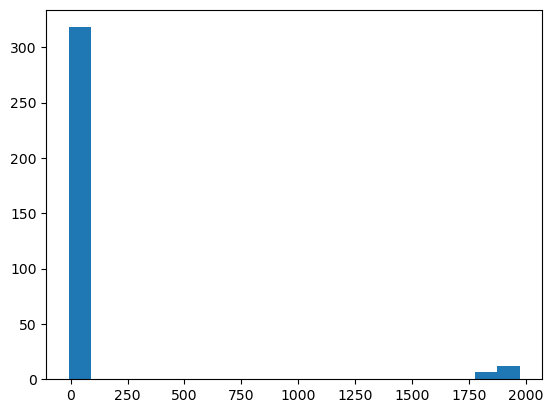

In [4]:
plt.hist(df['StartYear2'], bins=20)
plt.show()

In [5]:
df["StartYear"] = df[["StartYear1", "StartYear2"]].max(axis=1)
df["EndYear"] = df[["EndYear1", "EndYear2"]].max(axis=1)
df.columns

Index(['WarNum', 'WarName', 'WarType', 'ccode', 'StateName', 'Side',
       'StartMonth1', 'StartDay1', 'StartYear1', 'EndMonth1', 'EndDay1',
       'EndYear1', 'StartMonth2', 'StartDay2', 'StartYear2', 'EndMonth2',
       'EndDay2', 'EndYear2', 'TransFrom', 'WhereFought', 'Initiator',
       'Outcome', 'TransTo', 'BatDeath', 'Version', 'StartYear', 'EndYear'],
      dtype='object')

In [6]:
df_clean = df[["WarNum", "WarName", "StateName", "Side", "StartYear", "EndYear", "WhereFought", "Outcome", "BatDeath"]]
df_clean.head()

,WarNum,WarName,StateName,Side,StartYear,EndYear,WhereFought,Outcome,BatDeath
0,1,Franco-Spanish War,Spain,2,1823,1823,2,2,600
1,1,Franco-Spanish War,France,1,1823,1823,2,1,400
2,4,First Russo-Turkish,Ottoman Empire,2,1828,1829,11,2,80000
3,4,First Russo-Turkish,Russia,1,1828,1829,11,1,50000
4,7,Mexican-American,Mexico,2,1846,1847,1,2,6000


In [7]:
df_clean = df_clean[df_clean["EndYear"]>1894]
df_clean.head()

,WarNum,WarName,StateName,Side,StartYear,EndYear,WhereFought,Outcome,BatDeath
76,73,First Sino-Japanese,China,2,1894,1895,7,2,10000
77,73,First Sino-Japanese,Japan,1,1894,1895,7,1,5000
78,76,Greco-Turkish,Greece,2,1897,1897,2,2,600
79,76,Greco-Turkish,Turkey,1,1897,1897,2,1,1400
80,79,Spanish-American,Spain,2,1898,1898,13,2,775


In [8]:
df_clean.set_index("WarName", inplace=True)

In [9]:
df_clean.index

Index(['First Sino-Japanese', 'First Sino-Japanese', 'Greco-Turkish',
       'Greco-Turkish', 'Spanish-American', 'Spanish-American',
       'Boxer Rebellion', 'Boxer Rebellion', 'Boxer Rebellion',
       'Boxer Rebellion',
       ...
       'Invasion of Afghanistan', 'Invasion of Afghanistan',
       'Invasion of Afghanistan', 'Invasion of Afghanistan',
       'Invasion of Afghanistan', 'Invasion of Afghanistan',
       'Invasion of Iraq', 'Invasion of Iraq', 'Invasion of Iraq',
       'Invasion of Iraq'],
      dtype='object', name='WarName', length=261)

In [10]:
len(set(df_clean.index))

69

## Movies

In [11]:
data = pd.read_table("data/movies_with_summaries.csv", sep=",")
data.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"['Thriller', 'Science Fiction', 'Horror', 'Adv...","['Action,Horror,Sci-Fi']",4.9,58872,14010832.0,98.0,['English Language'],['United States of America'],"Set in the second half of the 22nd century, th..."
1,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,['Drama'],['Drama'],5.9,648,NaN,106.0,['German Language'],['Germany'],"Eva, an upper class housewife, becomes frustra..."
2,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"['Costume drama', 'War film', 'Epic', 'Period ...","['Biography,Drama,History']",7.5,32088,10161099.0,137.0,['English Language'],['United Kingdom'],{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"['ChildrensFamily', 'Musical', 'Fantasy', 'Com...","['Comedy,Family,Fantasy']",7.8,189202,102272727.0,139.0,['English Language'],['United States of America'],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],['Drama'],7.7,24,NaN,108.0,['German Language'],['German Democratic Republic'],"Otto Brosowski, a communist miner, writes to t..."


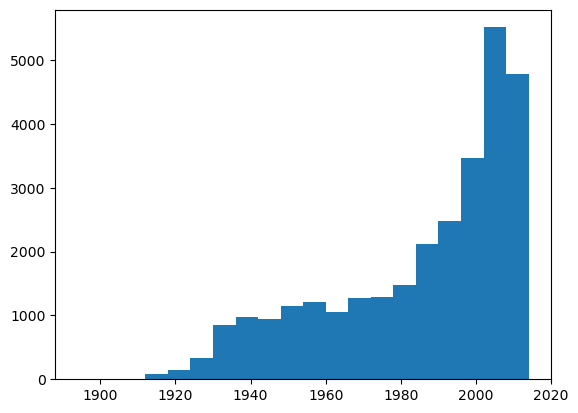

1894


In [12]:
plt.hist(data['Year'], bins=20)
plt.show()
print(data['Year'].min())

In [13]:
counts = []
for war in df_clean.index:
    start_year = df_clean.loc[war, "StartYear"].min()
    end_year = df_clean.loc[war, "EndYear"].max()
    print(start_year, end_year)
    movies_war = data[data['Year'].between(start_year-2, end_year+2)]
    print(f"Movies about {war}: {len(movies_war)}")
    counts.append(len(movies_war))
df_clean["Movies"] = counts

1894 1895
Movies about First Sino-Japanese: 2
1894 1895
Movies about First Sino-Japanese: 2
1897 1897
Movies about Greco-Turkish: 1
1897 1897
Movies about Greco-Turkish: 1
1898 1898
Movies about Spanish-American: 1
1898 1898
Movies about Spanish-American: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Boxer Rebellion: 1
1900 1900
Movies about Sino-Russian: 1
1900 1900
Movies about Sino-Russian: 1
1904 1905
Movies about Russo-Japanese: 5
1904 1905
Movies about Russo-Japanese: 5
1906 1906
Movies about Third Central American: 3
1906 1906
Movies about Third Central American: 3
1906 1906
Movies about Third Central American: 3
1907 1907
Movies about Fourth Central American: 3
1907 1907
Movies about Fourth Central American: 3
1907 1907
Movies about Fourth Central American: 3
1909 1910
Movies about Second Spa

In [14]:
df_clean=df_clean[df_clean["Movies"]>500]
df_clean.head()

,WarNum,StateName,Side,StartYear,EndYear,WhereFought,Outcome,BatDeath,Movies
WarName,,,,,,,,,
Second Sino-Japanese,121,Japan,1,1931,1933,7,1,10000,931
Second Sino-Japanese,121,China,2,1931,1933,7,2,50000,931
Chaco,124,Bolivia,2,1932,1935,1,2,56661,1198
Chaco,124,Paraguay,1,1932,1935,1,1,36000,1198
Saudi-Yemeni,125,Saudi Arabia,1,1934,1934,6,1,100,806


In [15]:
df_clean.to_csv("data/wars_filtered_clean.csv")